Lets load all the things in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ml-20m/ratings.csv', sep=',', usecols=['userId', 'movieId', 'rating'])

# Reading movies file
movies = pd.read_csv('ml-20m/movies.csv', sep=',', usecols=['movieId', 'title', 'genres'])

In [2]:
# Check the file info
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 3 columns):
userId     int64
movieId    int64
rating     float64
dtypes: float64(1), int64(2)
memory usage: 457.8 MB
None


In [3]:
# Check the top 5 rows
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
# Check the file info
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB
None


# Data Exploration
## Titles

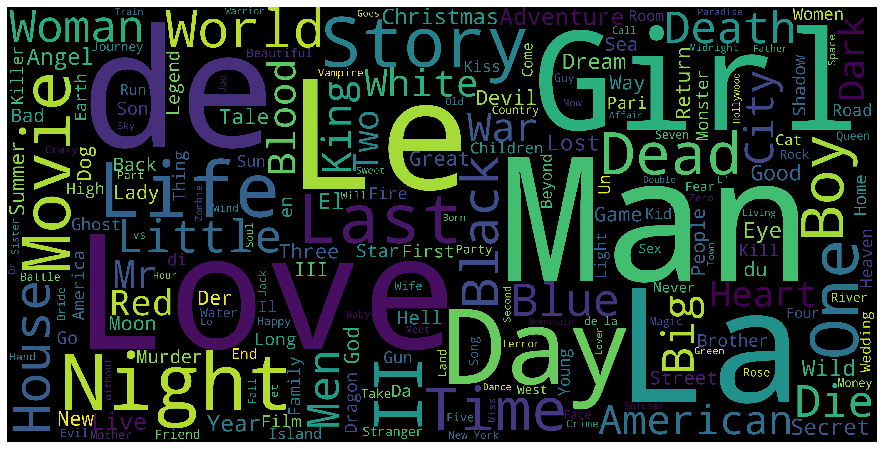

In [5]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Ratings

In [6]:
# Get summary statistics of rating
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

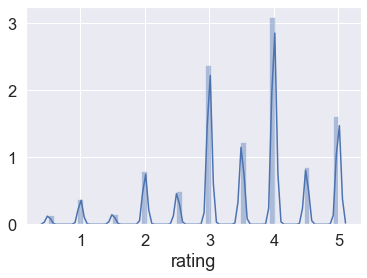

In [7]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

the top 20 movies

In [8]:
# Join the 2 files into one dataframe
dataset = pd.merge(movies, ratings)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).drop_duplicates().head(20)

,title,genres,rating
13420269,Gladiator (2000),Action|Adventure|Drama,5.0
2163019,"Shawshank Redemption, The (1994)",Crime|Drama,5.0
16498925,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy,5.0
4034636,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,5.0
5994160,When We Were Kings (1996),Documentary,5.0
6861859,"Femme Nikita, La (Nikita) (1990)",Action|Crime|Romance|Thriller,5.0
13193971,Close Encounters of the Third Kind (1977),Adventure|Drama|Sci-Fi,5.0
10204966,"Player, The (1992)",Comedy|Crime|Drama,5.0
9140845,Midnight Cowboy (1969),Drama,5.0
9143935,"French Connection, The (1971)",Action|Crime|Thriller,5.0


In [9]:
# Check the top 5 rows
print(ratings.head())

   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5


## Genres

In [10]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520]]